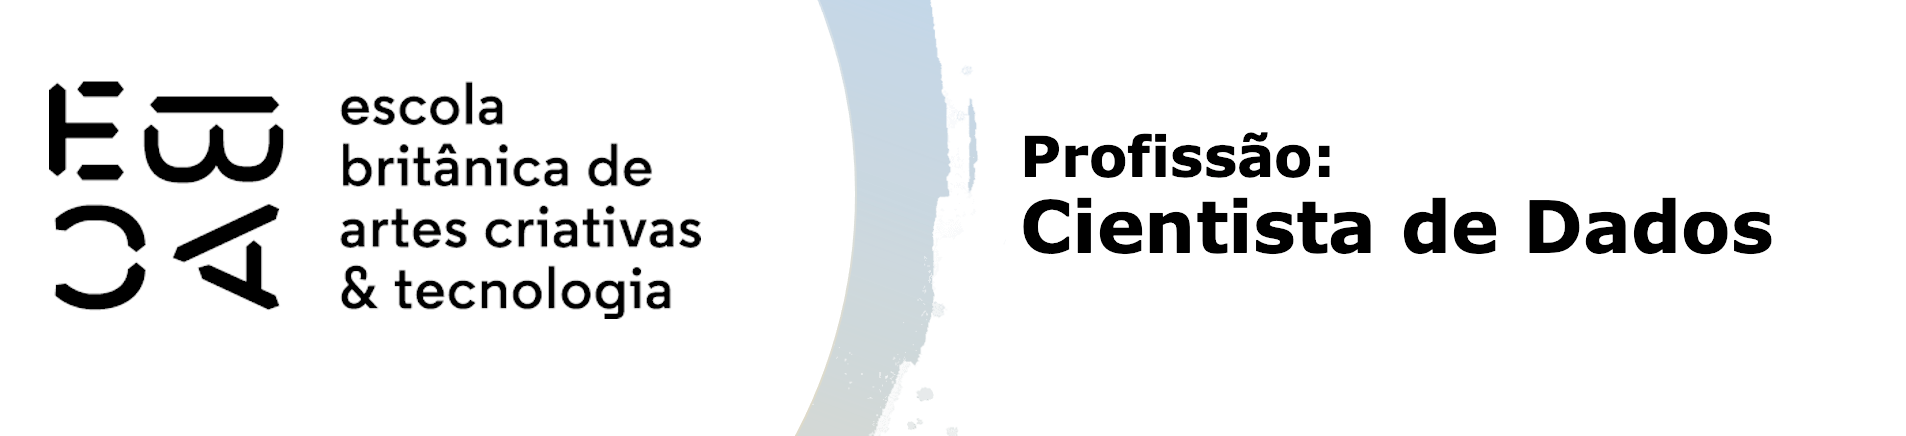

# Métodos hierárquicos de agrupamento - Tarefa

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.cluster import hierarchy


import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [6]:
# 1. Selecione as variáveis quantitativas da base de pinguins

# Carregar um conjunto de dados de pinguins (penguins) em um DataFrame chamado 'df'.
df = sns.load_dataset('penguins')

# Filtrar o DataFrame 'df' para incluir apenas colunas que contêm tipos de dados numéricos.
df_num = df.select_dtypes(include='number')

# Imprimir informações sobre o DataFrame 'df_num', incluindo o número de colunas, o número de valores não nulos e os tipos de dados de cada coluna.
print(df_num.info())

# Exibir o DataFrame 'df_num', que agora contém apenas colunas com tipos de dados numéricos.
df_num

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 10.9 KB
None


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [4]:
# 2. Elimine valores faltantes

# Exibir as linhas no DataFrame 'df_num' que contêm valores faltantes (NaN).
display(df_num[df_num.isna().any(axis=1)])

# Remover as linhas com valores faltantes do DataFrame 'df_num' e atualizar o DataFrame com as alterações.
df_num.dropna(inplace=True)

# Exibir o DataFrame 'df_num' após a remoção das linhas.
df_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
3,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [7]:
# 3. Padronize as variáveis para média zero e desvio padrão 1

# Criar uma instância do objeto StandardScaler, que será usado para padronizar os dados.
scaler = StandardScaler()

# Aplicar o método fit_transform() do StandardScaler para padronizar os dados numéricos no DataFrame 'df_num'.
df_num_pad = scaler.fit_transform(df_num)

# Criar um novo DataFrame a partir dos dados padronizados e exibi-lo.
pd.DataFrame(df_num_pad)

,0,1,2,3
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,NaN,NaN,NaN,NaN
4,-1.324737,1.089724,-0.563715,-0.938776
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,0.527932,-1.445897,1.003109,0.809516
341,1.188289,-0.735923,1.501644,1.933419
342,0.234440,-1.192335,0.789451,1.246590


In [14]:
# 4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos


df_num = df.select_dtypes(include='number')

imputer = SimpleImputer(strategy='mean')
df_num_imputed = imputer.fit_transform(df_num)  # Retorna um array NumPy


scaler = StandardScaler()
df_num_pad = scaler.fit_transform(df_num_imputed) 


df_num_pad = pd.DataFrame(df_num_pad, columns=df_num.columns) 


print(df_num_pad.isna().sum())


clustering = AgglomerativeClustering(n_clusters=3, 
                                     linkage='complete', 
                                     distance_threshold=None)


df_num_pad["Cluster"] = clustering.fit_predict(df_num_pad)

# Aplicar o modelo de clustering aos dados padronizados no DataFrame 'df_num_pad'.
clustering.fit(df_num_pad)

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64


AgglomerativeClustering(linkage='complete', n_clusters=3)

In [15]:
# Adicionar uma nova coluna chamada 'grupo' ao DataFrame 'df_num' para armazenar os rótulos de cluster gerados pelo modelo de clustering.
df_num['grupo'] = clustering.labels_

# Exibir o DataFrame 'df_num' com a nova coluna 'grupo' que contém as etiquetas de cluster atribuídas a cada instância de dados.
df_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
3,NaN,NaN,NaN,NaN,1
4,36.7,19.3,193.0,3450.0,1
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,1
340,46.8,14.3,215.0,4850.0,0
341,50.4,15.7,222.0,5750.0,0
342,45.2,14.8,212.0,5200.0,0


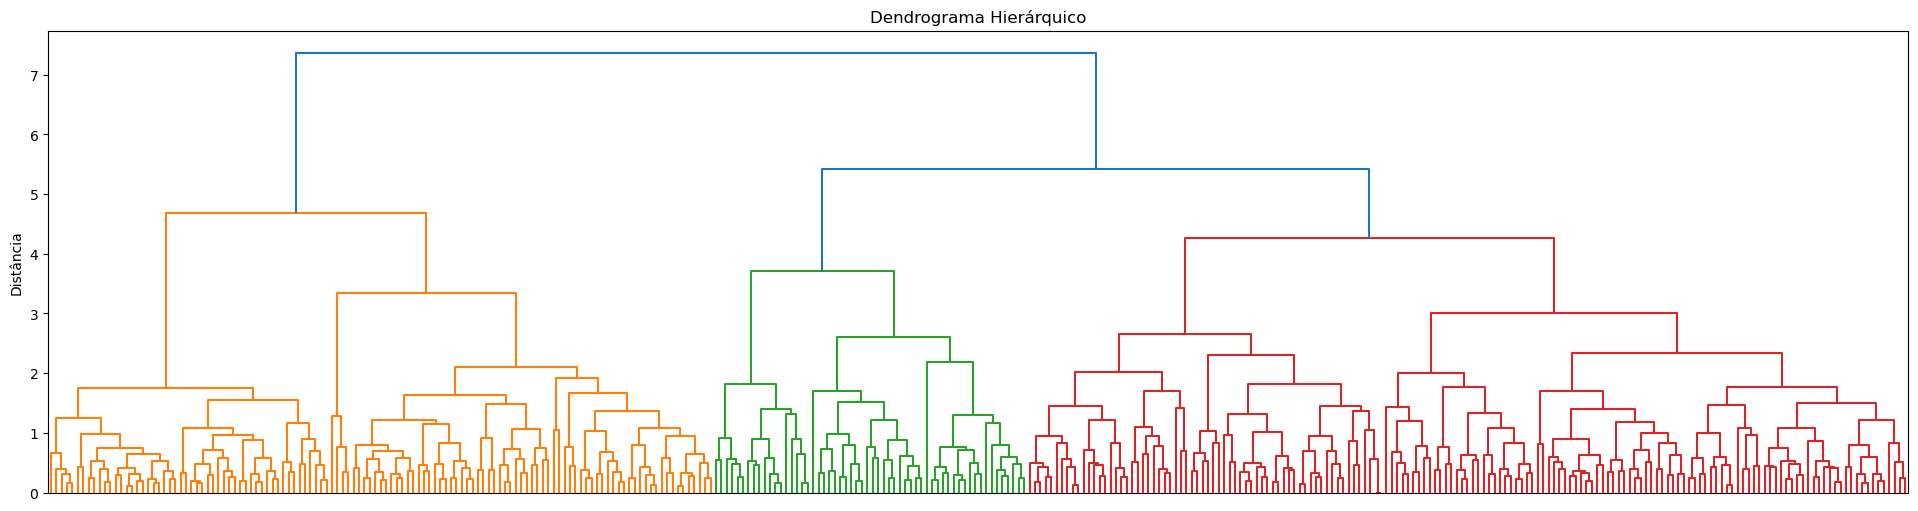

In [18]:
# 5. Faça o Dendrograma

# Calcular a matriz de ligação com o método 'complete' (ligação completa).
Z = shc.linkage(df_num_pad, method='complete')

# Plotar o dendrograma hierárquico.
plt.figure(figsize=(24, 6))  # Tamanho da figura
dn = shc.dendrogram(Z)  # Gera o dendrograma com base na matriz de ligação Z

# Títulos e rótulos.
plt.title('Dendrograma Hierárquico')
plt.xticks([])  # Remove os rótulos no eixo x (para melhor visualização)
plt.ylabel('Distância')  # Rótulo do eixo y (distância entre os clusters)

# Exibe o dendrograma.
plt.show()


## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

Quantos pinguins de cada espécie há em cada grupo?

Grupo 0: 182 pinguins
Grupo 1: 120 pinguins
Grupo 2: 42 pinguins


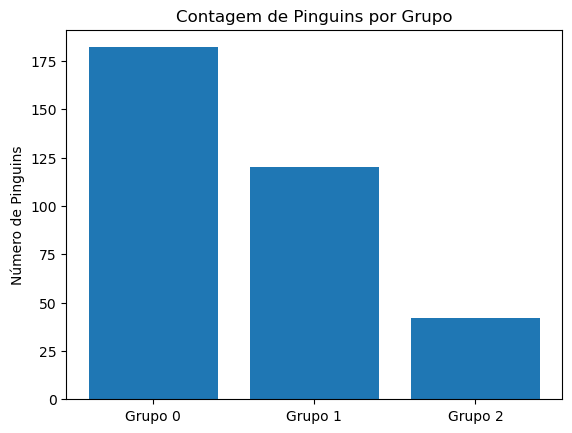

In [23]:
# Selecionar as variáveis numéricas para o agrupamento
df_num = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Usar SimpleImputer para preencher os valores faltantes com a média de cada coluna
imputer = SimpleImputer(strategy='mean')
df_num_imputed = imputer.fit_transform(df_num)

# 1. Agrupamento hierárquico
clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
df['grupo'] = clustering.fit_predict(df_num_imputed)

# 2. Contagem de pinguins por grupo
print('Quantos pinguins de cada espécie há em cada grupo?\n')

# Contar o número de pinguins em cada grupo e classificar os resultados por índice (rótulo do grupo).
contagem_grupos = df['grupo'].value_counts().sort_index()

# Usar um loop para imprimir o número de pinguins em cada grupo.
for indice, valor in enumerate(contagem_grupos):
    print(f'Grupo {indice}: {valor} pinguins')

# 3. Criar rótulos para os grupos com base nos índices dos grupos.
rotulos_grupos = [f'Grupo {grupo}' for grupo in contagem_grupos.index]

# 4. Criar um gráfico de barras com os rótulos dos grupos e a contagem de pinguins em cada grupo.
plt.bar(rotulos_grupos, contagem_grupos)

# 5. Adicionar rótulo ao eixo y e um título ao gráfico.
plt.ylabel('Número de Pinguins')
plt.title('Contagem de Pinguins por Grupo')

# 6. Exibir o gráfico de barras.
plt.show()

grupo,0,1,2
species,,,
Adelie,121,31,0
Chinstrap,59,9,0
Gentoo,2,80,42


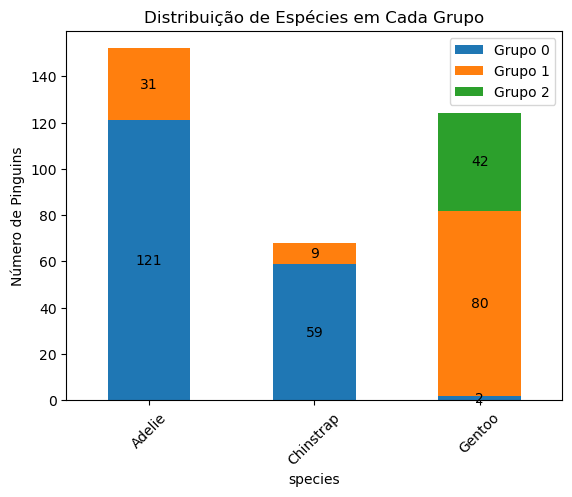

In [25]:
# Selecionar as variáveis numéricas para o agrupamento
df_num = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Usar SimpleImputer para preencher os valores faltantes com a média de cada coluna
imputer = SimpleImputer(strategy='mean')
df_num_imputed = imputer.fit_transform(df_num)

# 1. Agrupamento hierárquico
clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
df['grupo'] = clustering.fit_predict(df_num_imputed)  # Adicionar a coluna 'grupo' ao DataFrame df

# 2. Criar uma tabela cruzada entre 'species' e 'grupo'
tabela_cruzada = pd.crosstab(df['species'], df['grupo'])

# Plotar a tabela cruzada como um gráfico de barras empilhadas
ax = tabela_cruzada.plot(kind='bar', stacked=True)

# Ajustar a rotação dos rótulos no eixo x
plt.xticks(rotation=45)

# Definir o rótulo do eixo y e um título ao gráfico
plt.ylabel('Número de Pinguins')
plt.title('Distribuição de Espécies em Cada Grupo')

# Adicionar uma legenda para identificar os grupos
plt.legend(labels=[f'Grupo {grupo}' for grupo in tabela_cruzada.columns])

# Adicionar os números inteiros dentro de cada barra
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:
        ax.annotate(int(height), (x + width/2, y + height/2), ha='center', va='center')

# Exibir a tabela cruzada no formato tabular
display(tabela_cruzada)

# Exibir o gráfico
plt.show()

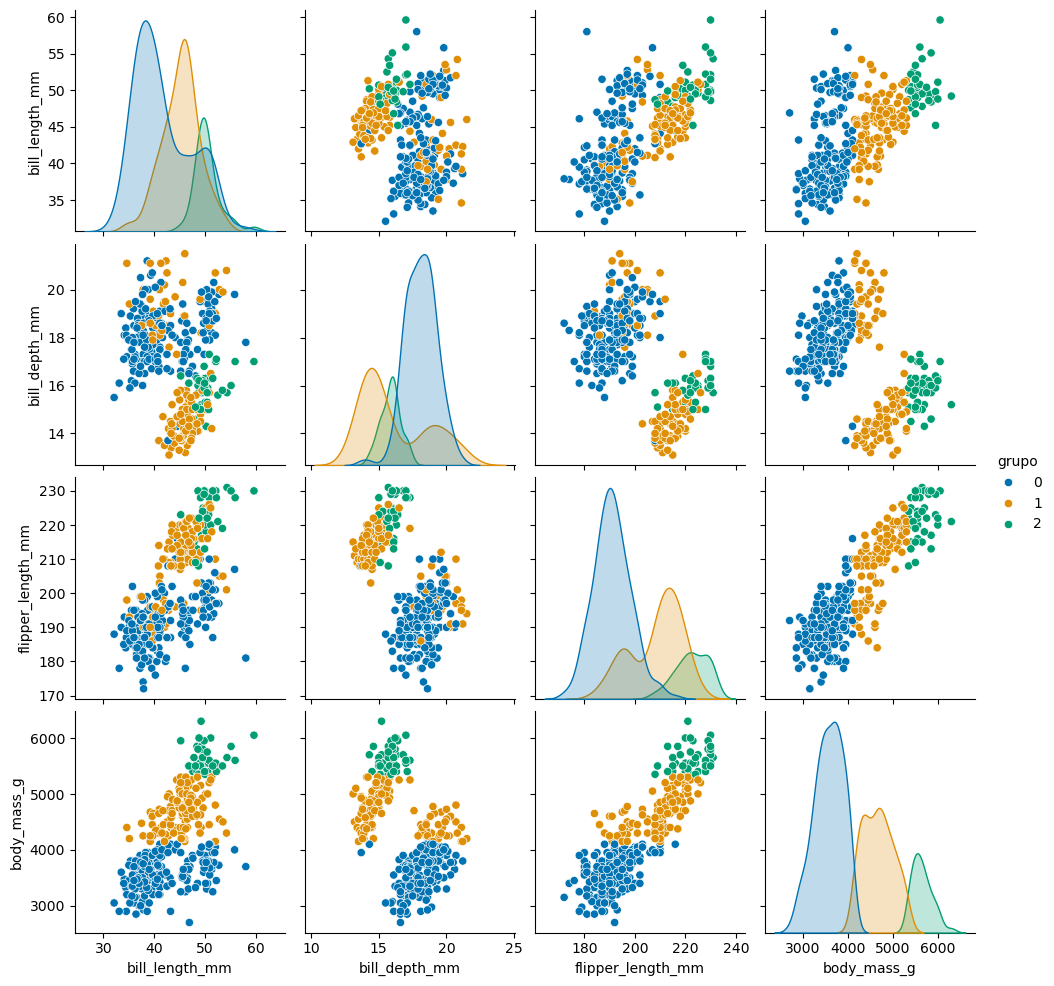

In [27]:
# Selecionar as variáveis numéricas para o agrupamento
df_num = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Usar SimpleImputer para preencher os valores faltantes com a média de cada coluna
imputer = SimpleImputer(strategy='mean')
df_num_imputed = imputer.fit_transform(df_num)

# 1. Agrupamento hierárquico
clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
df['grupo'] = clustering.fit_predict(df_num_imputed)  # Adicionar a coluna 'grupo' ao DataFrame df

# Agora que a coluna 'grupo' está no DataFrame 'df', podemos criar o gráfico pairplot com a coluna 'grupo'
sns.pairplot(data=df, hue='grupo', palette='colorblind')

# Exibir o gráfico
plt.show()

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

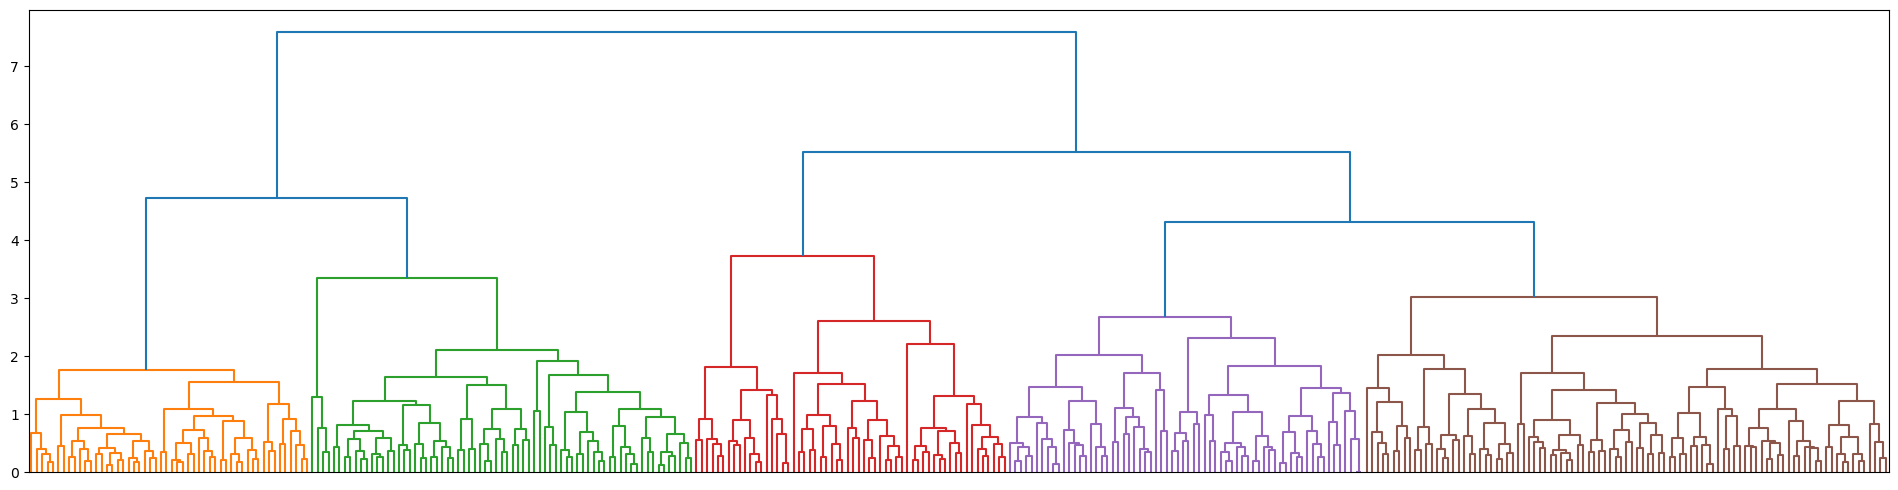

In [41]:
# Padronizar os dados
scaler = StandardScaler()
df_num_pad = scaler.fit_transform(df_num)

# Configurar o tamanho da figura para o dendrograma
plt.figure(figsize=(24, 6))

# Calcular a ligação hierárquica usando o método de ligação 'complete'
Z = hierarchy.linkage(df_num_pad, method='complete')

# Plotar o dendrograma usando os resultados da ligação hierárquica
# A opção 'color_threshold' define um limite de cor para destacar os clusters
dn = hierarchy.dendrogram(Z, color_threshold=3.8)

# Remover os rótulos do eixo x para melhorar a legibilidade
plt.xticks([])

# Exibir o dendrograma hierárquico
plt.show()

In [42]:
# Criar uma instância do modelo de clustering AgglomerativeClustering com 6 clusters,
# método de ligação 'complete' e sem limite de distância.
clustering = AgglomerativeClustering(n_clusters=5, linkage='complete', distance_threshold=None)

# Aplicar o modelo de clustering aos dados padronizados no DataFrame 'df_num_pad'.
clustering.fit(df_num_pad)

# Adicionar uma nova coluna chamada 'subgrupo' ao DataFrame 'df_num' para armazenar as etiquetas de subgrupo geradas pelo modelo de clustering.
df_num['subgrupo'] = clustering.labels_

# Exibir o DataFrame 'df_num' com a nova coluna 'subgrupo' que contém as etiquetas de subgrupo atribuídas a cada instância de dados.
df_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster,subgrupo
0,39.10000,18.70000,181.000000,3750.000000,5,2
1,39.50000,17.40000,186.000000,3800.000000,5,2
2,40.30000,18.00000,195.000000,3250.000000,5,2
3,43.92193,17.15117,200.915205,4201.754386,4,4
4,36.70000,19.30000,193.000000,3450.000000,5,2
...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,4,4
340,46.80000,14.30000,215.000000,4850.000000,1,3
341,50.40000,15.70000,222.000000,5750.000000,2,1
342,45.20000,14.80000,212.000000,5200.000000,1,3


Quantos pinguins de cada espécie há em cada grupo?

Subgrupo 0: 58 pinguins
Subgrupo 1: 71 pinguins
Subgrupo 2: 97 pinguins
Subgrupo 3: 52 pinguins
Subgrupo 4: 66 pinguins


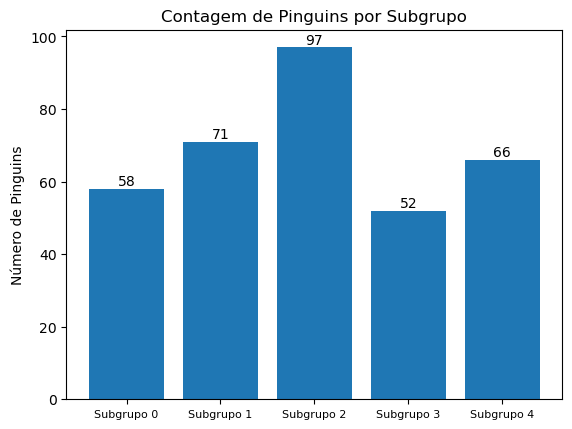

In [43]:
print('Quantos pinguins de cada espécie há em cada grupo?\n')

# Contar o número de pinguins em cada subgrupo e classificar os resultados por índice (rótulo do subgrupo).
contagem_subgrupos = df_num['subgrupo'].value_counts().sort_index()

# Usar um loop para imprimir o número de pinguins em cada subgrupo.
for indice, valor in enumerate(contagem_subgrupos):
    print('Subgrupo {}: {} pinguins'.format(indice, valor))

# Criar rótulos para os subgrupos com base nos índices dos subgrupos.
rotulos_subgrupos = [f'Subgrupo {grupo}' for grupo in contagem_subgrupos.index]

# Criar um gráfico de barras com os rótulos dos subgrupos e a contagem de pinguins em cada subgrupo.
plt.bar(rotulos_subgrupos, contagem_subgrupos)

# Adicionar um título ao gráfico, rótulo ao eixo y e ajustar o tamanho dos rótulos no eixo x.
plt.title('Contagem de Pinguins por Subgrupo')
plt.ylabel('Número de Pinguins')
plt.xticks(fontsize=8)

# Adicionar as quantidades dentro de cada coluna do gráfico de barras.
for i, v in enumerate(contagem_subgrupos):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Exibir o gráfico de barras.
plt.show()

Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?


sex,Female,Male
subgrupo,,
0,24,34
1,9,61
2,75,18
3,49,0
4,8,55



Tabela cruzada percentual:


species   Adelie         Chinstrap          Gentoo        
sex       Female    Male    Female    Male  Female    Male
subgrupo                                                  
0          0.00%   0.00%     7.21%  10.21%   0.00%   0.00%
1          0.00%   0.00%     0.00%   0.00%   2.70%  18.32%
2         20.72%   5.41%     1.80%   0.00%   0.00%   0.00%
3          0.00%   0.00%     0.00%   0.00%  14.71%   0.00%
4          1.20%  16.52%     1.20%   0.00%   0.00%   0.00%

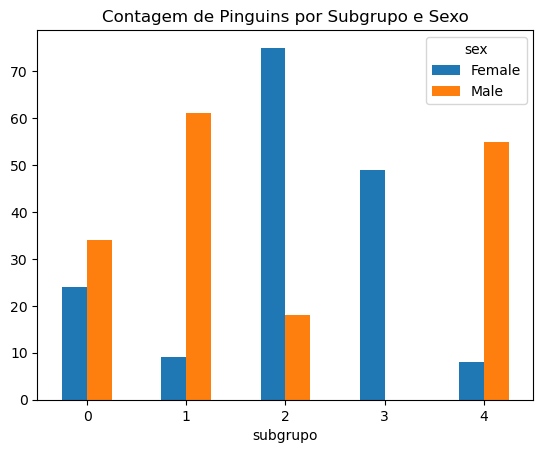

In [45]:
# Mesclar o DataFrame 'df_num' com as colunas 'sex' e 'species' do DataFrame original 'df' usando o índice como chave de mesclagem
df_ = df_num.merge(right=df[['sex', 'species']], how='left', left_index=True, right_index=True)

# Contar a frequência dos pares de valores nas colunas 'subgrupo' e 'sex' usando a função value_counts
# Em seguida, desempilhar o resultado para criar uma tabela cruzada
# Qualquer valor ausente (NaN) é preenchido com zero (0) e os valores são convertidos para inteiros
contagem_subgrupo_sex = (df_[['subgrupo', 'sex']].value_counts().unstack().fillna(0).astype(int))

print('Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?')

# Exibir a tabela cruzada com a contagem de pinguins por subgrupo e sexo
display(contagem_subgrupo_sex)

print('\nTabela cruzada percentual:')

# Calcular a tabela cruzada percentual das espécies por subgrupo e sexo
tabela_cruzada_percentual = pd.crosstab(index=[df_['subgrupo'], df_['sex']], columns=df_['species'], normalize=True) * 100
tabela_cruzada_percentual = tabela_cruzada_percentual.unstack().fillna(0)

# Exibir a tabela cruzada percentual com valores formatados para duas casas decimais usando o método map
display(tabela_cruzada_percentual.map(lambda x: f'{x:.2f}%'))

# Plotar a tabela cruzada como um gráfico de barras
contagem_subgrupo_sex.plot(kind='bar')

# Adicionar um título ao gráfico, definir a rotação dos rótulos no eixo x e exibir o gráfico de barras
plt.title('Contagem de Pinguins por Subgrupo e Sexo')
plt.xticks(rotation=0)
plt.show()

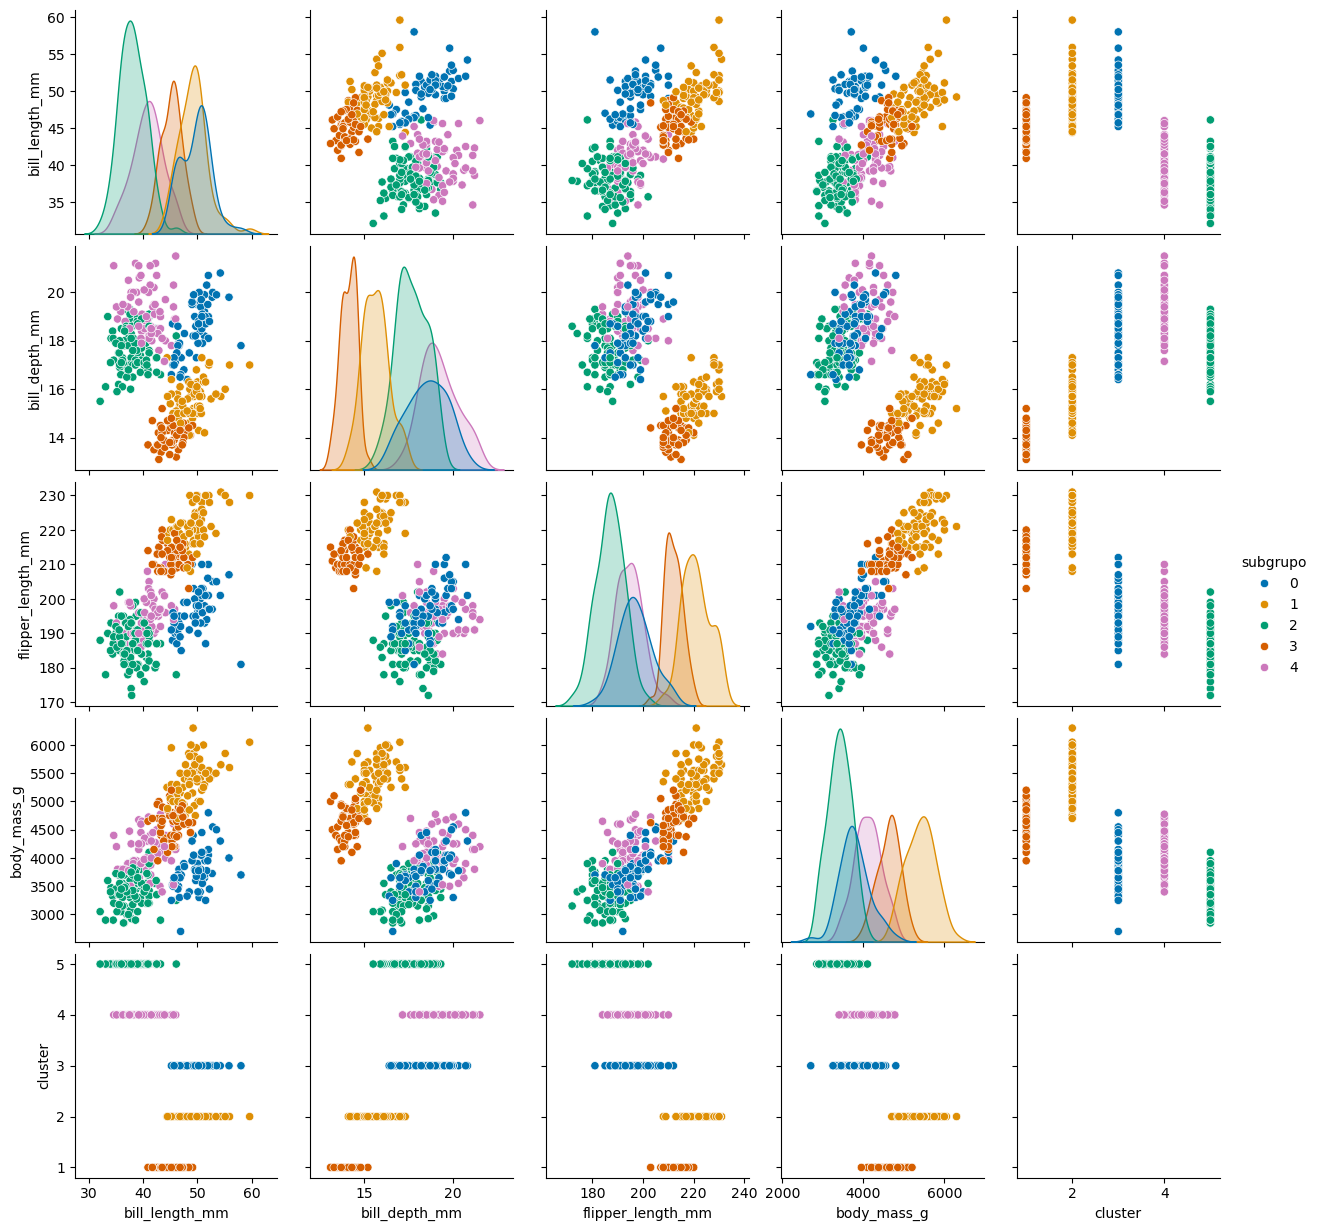

In [46]:
# Criar um pair plot (gráfico de pares) usando o DataFrame 'df_'.
# A opção 'hue' é usada para colorir os pontos com base no novo agrupamento.
# A opção 'palette' define a paleta de cores a ser usada.
sns.pairplot(data=df_, hue='subgrupo', palette='colorblind');

Na minha opinião, o novo agrupamento hierárquico em que foram definidos 5 grupos (n-clusters) parece capturar alguns padrões naturais nos dados. Observando a tabela cruzada percentual, podemos relacionar os grupos resultantes com as variáveis da base original, como espécie e sexo dos pinguins.